In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('superheated_vapor_properties.csv')

In [3]:
V_data=pd.DataFrame()
for row in range(len(df.index)):
    count=row
    if df["Property"].values[count] is "V":
        V_data=V_data.append(df.loc[row],ignore_index=True)
print(V_data)

          100       125       150       175       200  220       225  240  \
0    172180.0  183720.0  195270.0  206810.0  218350.0  NaN  229890.0  NaN   
1     17190.0   18350.0   19510.0   20660.0   21820.0  NaN   22980.0  NaN   
2      8584.7    9167.1    9748.0   10320.0   10900.0  NaN   11480.0  NaN   
3      5714.4    6104.6    6493.2    6880.8    7267.5  NaN    7653.8  NaN   
4      4279.2    4573.3    4865.8    5157.2    5447.8  NaN    5738.0  NaN   
..        ...       ...       ...       ...       ...  ...       ...  ...   
131       NaN       NaN       NaN       NaN       NaN  NaN       NaN  NaN   
132       NaN       NaN       NaN       NaN       NaN  NaN       NaN  NaN   
133       NaN       NaN       NaN       NaN       NaN  NaN       NaN  NaN   
134       NaN       NaN       NaN       NaN       NaN  NaN       NaN  NaN   
135       NaN       NaN       NaN       NaN       NaN  NaN       NaN  NaN   

          250  260  ...         550     575         600     625         650

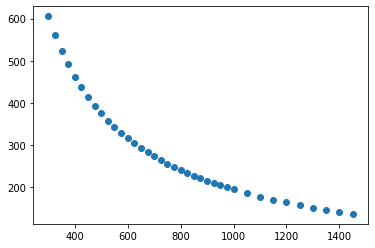

In [4]:
df2=V_data[ (V_data['Pressure']>=300) & (V_data['Pressure']<1500)]
plt.scatter(df2["Pressure"],df2["Vap_Sat"])

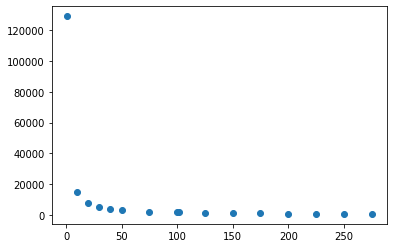

In [5]:

df3=V_data[ (V_data['Pressure']<300)]
plt.scatter(df3["Pressure"],df3["Vap_Sat"])


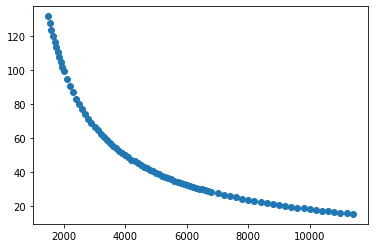

In [6]:

df4=V_data[ (V_data['Pressure']>=1500)]
plt.scatter(df4["Pressure"],df4["Vap_Sat"])

In [7]:
df2.shape
N2=df2.shape[0]

In [8]:
df3.shape
N3=df3.shape[0]

In [9]:
df4.shape
N4=df4.shape[0]
L=[]

In [10]:
def result(m1,x,c1):
    return m1*x+c1

In [11]:
def loss(y_hat, y):
    l = (y_hat - y) ** 2 
    return l.mean()

In [12]:
m1=0.01
c1=0.0

In [13]:
learning_rate = 0.1
total_iter = 50001
x=df4["Pressure"]
y=df4["Vap_Sat"]
print(x)
x=x/np.max(x)
y=y/np.max(y)
x = np.reshape(x.to_numpy(), (len(x),1))
y = np.reshape(y.to_numpy(), (len(x),1))

54      1500.0
55      1550.0
56      1600.0
57      1650.0
58      1700.0
        ...   
131    10600.0
132    10800.0
133    11000.0
134    11200.0
135    11400.0
Name: Pressure, Length: 82, dtype: float64


total iteration:  0


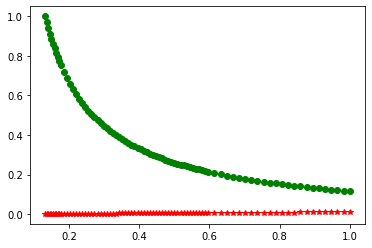

total iteration:  10000


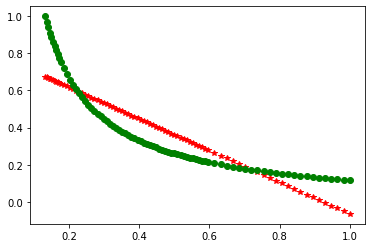

total iteration:  20000


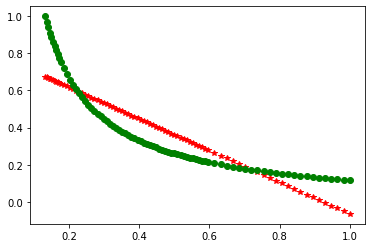

total iteration:  30000


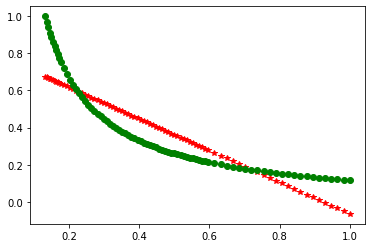

total iteration:  40000


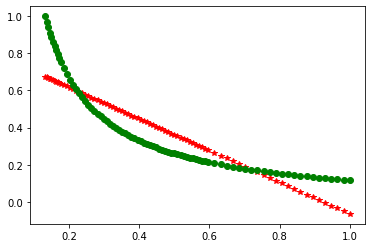

total iteration:  50000


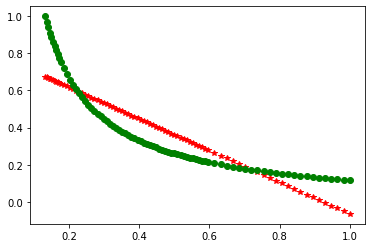

[0.2011772206294798, 0.013750978190511087, 0.013750978190511087, 0.013750978190511087, 0.013750978190511087, 0.013750978190511087]


In [14]:
for i in range(total_iter):
    
    y_hat=result(m1,x,c1)
    dm=1/N3*np.sum(x*((m1*x+c1)-y))
    dc=1/N3*np.sum(((m1*x+c1)-y))
    m1=m1-dm*learning_rate
    c1=c1-dc*learning_rate
    if i%10000==0:
        L.append(loss(y,y_hat))
        print("total iteration: ",i)
        plt.plot(x,y_hat,"r*")
        plt.plot(x,y,"go")
        
        plt.show()
print(L)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_regression = LinearRegression()
target,data=y,x
linear_regression.fit(data, target)

LinearRegression()

In [16]:
m= linear_regression.coef_[0]
c=linear_regression.intercept_

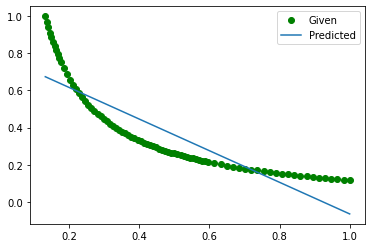

In [17]:
y=m*x+c

plt.plot(data,target,"go")
plt.plot(data,y)



plt.legend(["Given","Predicted"])
plt.show()

In [32]:
r2_score(target,y)

0.8402322107077735

In [ ]:
##################################################################

In [18]:
m1=0.001
c1=0.0

In [19]:
x=df3["Pressure"]
y=df3["Vap_Sat"]
x = np.reshape(x.to_numpy(), (len(x),1))
y = np.reshape(y.to_numpy(), (len(x),1))
x=x/np.max(x)
y=y/np.max(y)

total iteration:  0


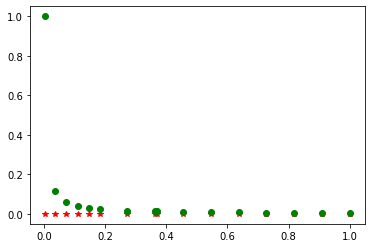

total iteration:  10000


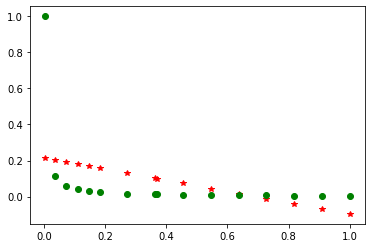

total iteration:  20000


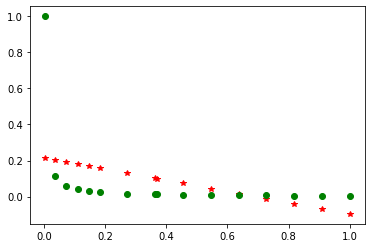

total iteration:  30000


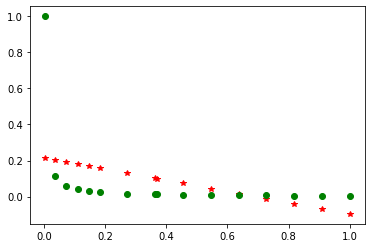

total iteration:  40000


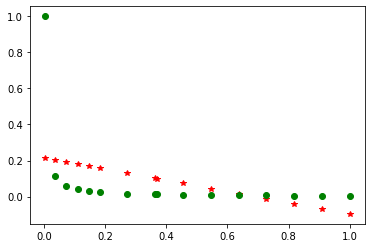

total iteration:  50000


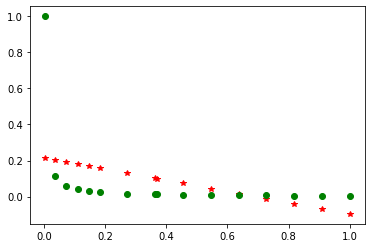

[0.2011772206294798, 0.013750978190511087, 0.013750978190511087, 0.013750978190511087, 0.013750978190511087, 0.013750978190511087, 0.06378157237167605, 0.047023290047407414, 0.047023290047407414, 0.047023290047407414, 0.047023290047407414, 0.047023290047407414]


In [20]:
for i in range(total_iter):
    
    y_hat=result(m1,x,c1)
    dm=1/N3*np.sum(x*((m1*x+c1)-y))
    dc=1/N3*np.sum(((m1*x+c1)-y))
    m1=m1-dm*learning_rate
    c1=c1-dc*learning_rate
    if i%10000==0:
        L.append(loss(y,y_hat))
        print("total iteration: ",i)
        plt.plot(x,y_hat,"r*")
        plt.plot(x,y,"go")
        
        plt.show()
print(L)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_regression = LinearRegression()
target,data=y,x
linear_regression.fit(data, target)

LinearRegression()

In [22]:
m= linear_regression.coef_[0]
c=linear_regression.intercept_

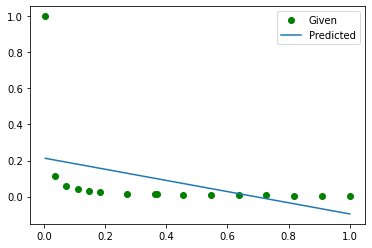

In [23]:
y=m*x+c

plt.plot(data,target,"go")
plt.plot(data,y)



plt.legend(["Given","Predicted"])
plt.show()

In [24]:
r2_score(target,y)

0.16815590648253165

In [25]:
m1=0.000001
c1=0.0

In [26]:
x=df2["Pressure"]
y=df2["Vap_Sat"]
x = np.reshape(x.to_numpy(), (len(x),1))
y = np.reshape(y.to_numpy(), (len(x),1))
x=x/np.max(x)
y=y/np.max(y)

total iteration:  0


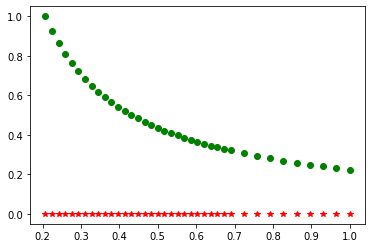

total iteration:  10000


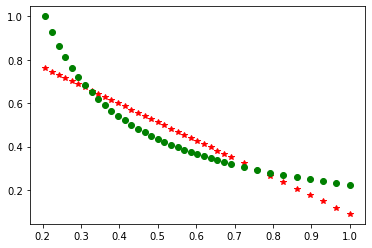

total iteration:  20000


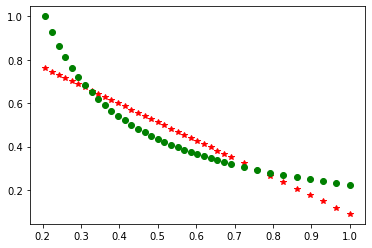

total iteration:  30000


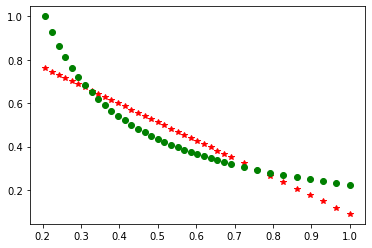

total iteration:  40000


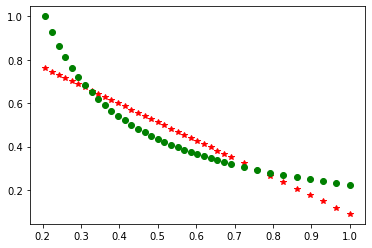

total iteration:  50000


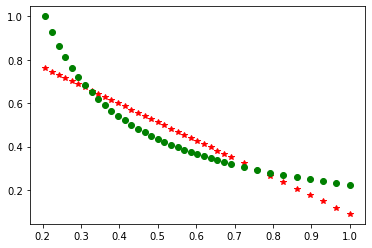

[0.2011772206294798, 0.013750978190511087, 0.013750978190511087, 0.013750978190511087, 0.013750978190511087, 0.013750978190511087, 0.06378157237167605, 0.047023290047407414, 0.047023290047407414, 0.047023290047407414, 0.047023290047407414, 0.047023290047407414, 0.2654304980899166, 0.0065993826632998204, 0.0065993826632998204, 0.0065993826632998204, 0.0065993826632998204, 0.0065993826632998204]


In [27]:
for i in range(total_iter):
    
    y_hat=result(m1,x,c1)
    dm=1/N3*np.sum(x*((m1*x+c1)-y))
    dc=1/N3*np.sum(((m1*x+c1)-y))
    m1=m1-dm*learning_rate
    c1=c1-dc*learning_rate
    if i%10000==0:
        L.append(loss(y,y_hat))
        print("total iteration: ",i)
        plt.plot(x,y_hat,"r*")
        plt.plot(x,y,"go")
        
        plt.show()
print(L)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_regression = LinearRegression()
target,data=y,x
linear_regression.fit(data, target)

LinearRegression()

In [29]:
m= linear_regression.coef_[0]
c=linear_regression.intercept_

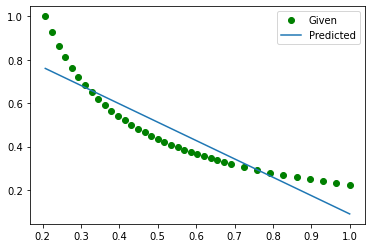

In [30]:
y=m*x+c

plt.plot(data,target,"go")
plt.plot(data,y)



plt.legend(["Given","Predicted"])
plt.show()

In [31]:
r2_score(target,y)

0.8402322107077735